## <span style='color:green'> Task 3 : Data Exploration & Preprocessing, Topic Modeling & Sentiment Analysis</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [2]:
# read the csv file generated from clean_tweets_dataframe.py
tweets_df = pd.read_csv("processed_tweet_data.csv")

# 3.1 Data Exploration

In [3]:
# display the first 5 rows from our dataset
tweets_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,4.0,2.0,i_ameztoy,20497,2621,NaN,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",NaN
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,691.0,201.0,ZIisq,65,272,NaN,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,NaN,NaN,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,NaN,NaN,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,1521.0,381.0,VizziniDolores,910,2608,NaN,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz"


In [4]:
# display dataframe information
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          22000 non-null  object 
 1   source              22000 non-null  object 
 2   original_text       22000 non-null  object 
 3   polarity            22000 non-null  float64
 4   subjectivity        22000 non-null  float64
 5   lang                22000 non-null  object 
 6   favorite_count      17260 non-null  float64
 7   retweet_count       17260 non-null  float64
 8   original_author     22000 non-null  object 
 9   followers_count     22000 non-null  int64  
 10  friends_count       22000 non-null  int64  
 11  possibly_sensitive  6191 non-null   object 
 12  hashtags            22000 non-null  object 
 13  user_mentions       22000 non-null  object 
 14  place               12107 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 2.5+

In [5]:
# check null values
tweets_df.isna()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
21996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21997,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False
21998,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [6]:
# shape of the dataframe
tweets_df.shape

(22000, 15)

In [7]:
# show columns of the dataframe
tweets_df.columns

Index(['created_at', 'source', 'original_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place'],
      dtype='object')

In [8]:
# drop empty values
tweets_df.dropna()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
5,Sun Aug 07 22:31:02 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,0.200,0.50,en,116.0,36.0,GraceCh15554845,207,54,False,"[{'text': 'Taiwan', 'indices': [84, 91]}]","[{'screen_name': 'benedictrogers', 'name': 'Be...","Melbourne, Victoria"
36,Sun Aug 07 22:26:25 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @ChinaInfo777: #PinkFloyd Roger Waters tell...,0.000,0.00,en,23.0,5.0,nhohn2011,870,508,False,"[{'text': 'PinkFloyd', 'indices': [18, 28]}, {...","[{'screen_name': 'ChinaInfo777', 'name': 'Chin...","Florida, USA"
39,Sun Aug 07 22:25:37 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","RT @WilliamYang120: ""For too long, #Taiwan has...",-0.025,0.20,en,311.0,84.0,hoggothoaryhost,44,60,False,"[{'text': 'Taiwan', 'indices': [35, 42]}]","[{'screen_name': 'WilliamYang120', 'name': 'Wi...",Hong Kong
43,Sun Aug 07 22:25:05 +0000 2022,"<a href=""https://help.twitter.com/en/using-twi...",RT @odisseoisback: #Corfu #Greece🇬🇷\n#Summer #...,0.000,0.00,en,0.0,2.0,hephaistos_ai,4161,208,False,"[{'text': 'Corfu', 'indices': [19, 25]}, {'tex...","[{'screen_name': 'odisseoisback', 'name': 'Odi...",Paris
48,Sun Aug 07 22:24:44 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,0.200,0.50,en,116.0,36.0,hoggothoaryhost,44,60,False,"[{'text': 'Taiwan', 'indices': [84, 91]}]","[{'screen_name': 'benedictrogers', 'name': 'Be...",Hong Kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21970,Sat Aug 06 18:04:33 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @IndoPac_Info: A good infographic of #China...,0.700,0.60,en,507.0,183.0,nayyarahmad,2285,3725,False,"[{'text': 'China', 'indices': [40, 46]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...","Lahore, Pakistan"
21981,Sat Aug 06 18:04:09 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @jenniferatntd: Head of #Taiwan's #missile ...,-0.200,0.40,en,194.0,99.0,threadmaxwhispe,657,864,False,"[{'text': 'Taiwan', 'indices': [27, 34]}, {'te...","[{'screen_name': 'jenniferatntd', 'name': 'Jen...",Land of Ethan South Dakota
21990,Sat Aug 06 18:03:47 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @SpokespersonCHN: #PLA Live-fire military d...,-0.100,0.25,en,2611.0,405.0,mumaralid,1164,605,True,"[{'text': 'PLA', 'indices': [21, 25]}, {'text'...","[{'screen_name': 'SpokespersonCHN', 'name': 'H...",Driver
21992,Sat Aug 06 18:03:33 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @jenniferatntd: Head of #Taiwan's #missile ...,-0.200,0.40,en,194.0,99.0,9thousandbytes,401,858,False,"[{'text': 'Taiwan', 'indices': [27, 34]}, {'te...","[{'screen_name': 'jenniferatntd', 'name': 'Jen...",Northern Virginia


In [9]:
tweets_df["source"] = tweets_df["source"].str.replace(r"(\s*\<.*?\>\s*)", " ", regex=True).str.strip()


In [10]:
tweets_df

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,Twitter for Android,RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,4.0,2.0,i_ameztoy,20497,2621,NaN,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",NaN
1,Sun Aug 07 22:31:16 +0000 2022,Twitter for Android,RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,691.0,201.0,ZIisq,65,272,NaN,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN
2,Sun Aug 07 22:31:07 +0000 2022,Twitter for Android,"China even cut off communication, they don't a...",0.000000e+00,0.000000,en,NaN,NaN,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands
3,Sun Aug 07 22:31:06 +0000 2022,Twitter for Android,"Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,NaN,NaN,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands
4,Sun Aug 07 22:31:04 +0000 2022,Twitter for iPhone,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,1521.0,381.0,VizziniDolores,910,2608,NaN,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Sat Aug 06 18:03:29 +0000 2022,Twitter for Android,RT @IndoPac_Info: A good infographic of #China...,7.000000e-01,0.600000,en,507.0,183.0,VandelayT,62,471,False,"[{'text': 'China', 'indices': [40, 46]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN
21996,Sat Aug 06 18:03:27 +0000 2022,Twitter for Android,RT @IndoPac_Info: A good infographic of #China...,7.000000e-01,0.600000,en,507.0,183.0,sashalenik,94,1751,False,"[{'text': 'China', 'indices': [40, 46]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",Gelendzhik
21997,Sat Aug 06 18:03:27 +0000 2022,Twitter for Android,@Reuters Thanks #Pelosi smart move.,2.071429e-01,0.421429,en,NaN,NaN,ZeitounRimal,88,0,NaN,"[{'text': 'Pelosi', 'indices': [16, 23]}]","[{'screen_name': 'Reuters', 'name': 'Reuters',...",🇺🇲🇷🇺🇺🇦🇫🇷🇦🇪🇮🇱🏳️‍🌈
21998,Sat Aug 06 18:03:26 +0000 2022,Twitter for Android,RT @IndoPac_Info: #Taiwan people's Desire for ...,5.000000e-02,0.350000,en,199.0,67.0,SazzyCowgirl1,537,317,NaN,"[{'text': 'Taiwan', 'indices': [18, 25]}, {'te...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...","Oregon, USA"


/tmp/ipykernel_105759/1494577151.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels, rotation=90)
/tmp/ipykernel_105759/1494577151.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


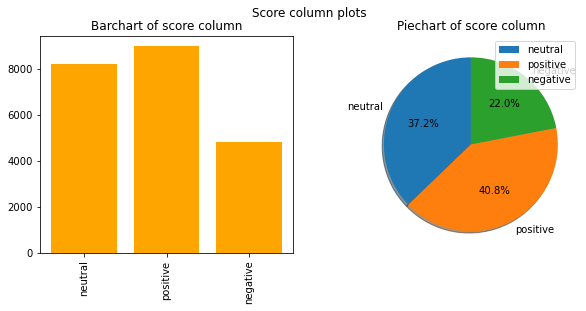

In [11]:
# Visualize polarity column using piechart and barchart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['neutral', 'positive', 'negative']

neutral_count =  len(tweets_df[tweets_df['polarity'] > 0])
positive_count = len(tweets_df[tweets_df['polarity'] == 0])
negative_count = len(tweets_df[tweets_df['polarity'] <0])
sizes = [neutral_count, positive_count, negative_count]
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of score column
ax[0].bar(x=labels, height=[neutral_count, positive_count, negative_count], color='orange')
ax[0].set_title('Barchart of score column')
ax[0].set_xticklabels(labels, rotation=90)

# Create a pie chart of score column based on neutral, positive or negative

ax[1].pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('Piechart of score column')
ax[1].legend(labels)

# Add a title to the Figure
fig.suptitle('Score column plots')

# Show the figure
fig.show()

# 3.2 Data Preprocessing

In [12]:
# add new column named clean_text to store cleaned original text
tweets_df.insert(4,column = 'clean_text',value = tweets_df['original_text'])

In [13]:
tweets_df.head()

,created_at,source,original_text,polarity,clean_text,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,Twitter for Android,RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,RT @i_ameztoy: Extra random image (I):\n\nLets...,0.190625,en,4.0,2.0,i_ameztoy,20497,2621,NaN,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",NaN
1,Sun Aug 07 22:31:16 +0000 2022,Twitter for Android,RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,RT @IndoPac_Info: #China's media explains the ...,0.100000,en,691.0,201.0,ZIisq,65,272,NaN,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN
2,Sun Aug 07 22:31:07 +0000 2022,Twitter for Android,"China even cut off communication, they don't a...",0.000000e+00,"China even cut off communication, they don't a...",0.000000,en,NaN,NaN,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands
3,Sun Aug 07 22:31:06 +0000 2022,Twitter for Android,"Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,"Putin to #XiJinping : I told you my friend, Ta...",0.350000,en,NaN,NaN,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands
4,Sun Aug 07 22:31:04 +0000 2022,Twitter for iPhone,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",0.556250,en,1521.0,381.0,VizziniDolores,910,2608,NaN,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz"


In [14]:
# add new column named sentimnt to where the text is positive,negative or neutral
# tweets_df.insert(7,column = 'sentiment',value = tweets_df['polarity'])
tweets_df

,created_at,source,original_text,polarity,clean_text,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,Twitter for Android,RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,RT @i_ameztoy: Extra random image (I):\n\nLets...,0.190625,en,4.0,2.0,i_ameztoy,20497,2621,NaN,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",NaN
1,Sun Aug 07 22:31:16 +0000 2022,Twitter for Android,RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,RT @IndoPac_Info: #China's media explains the ...,0.100000,en,691.0,201.0,ZIisq,65,272,NaN,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN
2,Sun Aug 07 22:31:07 +0000 2022,Twitter for Android,"China even cut off communication, they don't a...",0.000000e+00,"China even cut off communication, they don't a...",0.000000,en,NaN,NaN,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands
3,Sun Aug 07 22:31:06 +0000 2022,Twitter for Android,"Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,"Putin to #XiJinping : I told you my friend, Ta...",0.350000,en,NaN,NaN,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands
4,Sun Aug 07 22:31:04 +0000 2022,Twitter for iPhone,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",0.556250,en,1521.0,381.0,VizziniDolores,910,2608,NaN,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Sat Aug 06 18:03:29 +0000 2022,Twitter for Android,RT @IndoPac_Info: A good infographic of #China...,7.000000e-01,RT @IndoPac_Info: A good infographic of #China...,0.600000,en,507.0,183.0,VandelayT,62,471,False,"[{'text': 'China', 'indices': [40, 46]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN
21996,Sat Aug 06 18:03:27 +0000 2022,Twitter for Android,RT @IndoPac_Info: A good infographic of #China...,7.000000e-01,RT @IndoPac_Info: A good infographic of #China...,0.600000,en,507.0,183.0,sashalenik,94,1751,False,"[{'text': 'China', 'indices': [40, 46]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",Gelendzhik
21997,Sat Aug 06 18:03:27 +0000 2022,Twitter for Android,@Reuters Thanks #Pelosi smart move.,2.071429e-01,@Reuters Thanks #Pelosi smart move.,0.421429,en,NaN,NaN,ZeitounRimal,88,0,NaN,"[{'text': 'Pelosi', 'indices': [16, 23]}]","[{'screen_name': 'Reuters', 'name': 'Reuters',...",🇺🇲🇷🇺🇺🇦🇫🇷🇦🇪🇮🇱🏳️‍🌈
21998,Sat Aug 06 18:03:26 +0000 2022,Twitter for Android,RT @IndoPac_Info: #Taiwan people's Desire for ...,5.000000e-02,RT @IndoPac_Info: #Taiwan people's Desire for ...,0.350000,en,199.0,67.0,SazzyCowgirl1,537,317,NaN,"[{'text': 'Taiwan', 'indices': [18, 25]}, {'te...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...","Oregon, USA"


In [15]:
# 
tweets_df = tweets_df[['original_text','clean_text','polarity']]

In [16]:
def text_category (polarity):
    if polarity > 0:
        return 'positive'
    if polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [17]:
score= pd.Series([text_category(row_value) for row_value in tweets_df['polarity']])
tweets_df = pd.concat([tweets_df, score.rename('sentiment')], axis=1)
tweets_df.head()

,original_text,clean_text,polarity,sentiment
0,RT @i_ameztoy: Extra random image (I):\n\nLets...,RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,negative
1,RT @IndoPac_Info: #China's media explains the ...,RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,negative
2,"China even cut off communication, they don't a...","China even cut off communication, they don't a...",0.000000e+00,neutral
3,"Putin to #XiJinping : I told you my friend, Ta...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,positive
4,"RT @ChinaUncensored: I’m sorry, I thought Taiw...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,negative


In [18]:
pip install gensim emoji

Note: you may need to restart the kernel to use updated packages.


In [19]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
import string
import re
import emoji
import nltk
# nltk.download('words')
words = set(nltk.corpus.words.words())

In [20]:

def clean(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.distinct_emoji_list(tweet)) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet

tweets_df['clean_text'] = tweets_df['original_text'].map(lambda x: cleaner(x))
tweets_df.head()

NameError: name 'cleaner' is not defined

In [21]:
class PrepareData:
  def __init__(self,df):
    self.df=df
    
  def preprocess_data(self):
    #tweets_df = self.df.loc[self.df['lang'] =="en"]

    
    #text Preprocessing
    tweets_df['clean_text']=tweets_df['clean_text'].astype(str)
    tweets_df['clean_text'] = tweets_df['clean_text'].apply(lambda x: x.lower())
    tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['clean_text']]
    word_list = [sent.split() for sent in sentence_list]
    # print(word_list)

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list) #generate unique tokens
    #  we can see the word to unique integer mapping
    # print(word_to_id.token2id)
    # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]
    # TFIDF

    return tweets_df['clean_text'],word_list, word_to_id, corpus_1

In [22]:
PrepareData_obj=PrepareData(tweets_df)
tweets_df['clean_text'],word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [23]:
#print(corpus)
tweets_df

,original_text,clean_text,polarity,sentiment
0,RT @i_ameztoy: Extra random image (I):\n\nLets...,rt iameztoy extra random image i\n\nlets focus...,-1.250000e-01,negative
1,RT @IndoPac_Info: #China's media explains the ...,rt indopacinfo chinas media explains the milit...,-1.000000e-01,negative
2,"China even cut off communication, they don't a...",china even cut off communication they dont anw...,0.000000e+00,neutral
3,"Putin to #XiJinping : I told you my friend, Ta...",putin to xijinping i told you my friend taiwa...,1.000000e-01,positive
4,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",rt chinauncensored i’m sorry i thought taiwan ...,-6.938894e-18,negative
...,...,...,...,...
21995,RT @IndoPac_Info: A good infographic of #China...,rt indopacinfo a good infographic of chinas mi...,7.000000e-01,positive
21996,RT @IndoPac_Info: A good infographic of #China...,rt indopacinfo a good infographic of chinas mi...,7.000000e-01,positive
21997,@Reuters Thanks #Pelosi smart move.,reuters thanks pelosi smart move,2.071429e-01,positive
21998,RT @IndoPac_Info: #Taiwan people's Desire for ...,rt indopacinfo taiwan peoples desire for unifi...,5.000000e-02,positive


In [24]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

In [25]:
# print(id_words)

# 3.3 Topic Modelling using Latent Dirichlet Allocation(LDA)
#### The purpose of LDA is mapping each teweets in our corpus to a set of topics which covers a good deal of the words in the tweet


In [26]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [27]:
pprint(lda_model.print_topics())

[(0,
  '0.055*"taiwan" + 0.054*"the" + 0.044*"on" + 0.041*"rt" + 0.036*"of" + '
  '0.027*"a" + 0.022*"in" + 0.019*"chinas" + 0.018*"indopacinfo" + '
  '0.016*"military"'),
 (1,
  '0.048*"to" + 0.036*"rt" + 0.034*"taiwan" + 0.033*"the" + 0.020*"and" + '
  '0.018*"a" + 0.017*"of" + 0.017*"china" + 0.014*"in" + 0.013*"is"'),
 (2,
  '0.049*"the" + 0.036*"rt" + 0.033*"is" + 0.024*"china" + 0.020*"this" + '
  '0.018*"taiwan" + 0.015*"by" + 0.014*"of" + 0.013*"video" + 0.012*"ukraine"'),
 (3,
  '0.034*"rt" + 0.030*"in" + 0.025*"island" + 0.018*"they" + 0.018*"taiwan’s" '
  '+ 0.017*"chinese" + 0.015*"near" + 0.015*"amp" + 0.015*"indopacinfo" + '
  '0.015*"3"'),
 (4,
  '0.036*"rt" + 0.034*"taiwan" + 0.025*"china" + 0.024*"part" + 0.022*"hotel" '
  '+ 0.017*"how" + 0.017*"your" + 0.015*"you" + 0.014*"wwiii" + 0.013*"do"')]


In [28]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('taiwan', 0.054944996),
   ('the', 0.053690467),
   ('on', 0.044240087),
   ('rt', 0.04092256),
   ('of', 0.03571116),
   ('a', 0.026685663),
   ('in', 0.021774951),
   ('chinas', 0.019176459),
   ('indopacinfo', 0.017581515),
   ('military', 0.016493807)]),
 (1,
  [('to', 0.047742136),
   ('rt', 0.03595016),
   ('taiwan', 0.033747945),
   ('the', 0.03346296),
   ('and', 0.019780524),
   ('a', 0.017708385),
   ('of', 0.017010953),
   ('china', 0.01670637),
   ('in', 0.013741816),
   ('is', 0.013092292)]),
 (2,
  [('the', 0.04856271),
   ('rt', 0.035591867),
   ('is', 0.03334386),
   ('china', 0.023586182),
   ('this', 0.019779766),
   ('taiwan', 0.018066239),
   ('by', 0.014996052),
   ('of', 0.0140073355),
   ('video', 0.01300017),
   ('ukraine', 0.011767802)]),
 (3,
  [('rt', 0.034384333),
   ('in', 0.030455116),
   ('island', 0.025355654),
   ('they', 0.01840708),
   ('taiwan’s', 0.018112538),
   ('chinese', 0.017257676),
   ('near', 0.015033988),
   ('amp', 0.014902736),
 

### Model Analysis 

In [29]:
# # Compute Perplexity

# #It's a measure of how good the model is. The lower the better. Perplexity is a negative value
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# doc_lda = lda_model[corpus]


# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)

In [30]:
pip install pyLDAvis 

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/home/egovridc/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/egovridc/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/egovridc/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/egovridc/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/egovridc/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: Depre

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.170947  0.062324       1        1  38.567505
0      0.100701  0.077701       2        1  29.437171
2      0.093970  0.080272       3        1  13.473442
3     -0.337276  0.104442       4        1   9.652836
4     -0.028342 -0.324740       5        1   8.869045, topic_info=       Term          Freq         Total Category  logprob  loglift
19      the  16675.000000  16675.000000  Default  30.0000  30.0000
114      on   7538.000000   7538.000000  Default  29.0000  29.0000
37   taiwan  16353.000000  16353.000000  Default  28.0000  28.0000
9        in   7080.000000   7080.000000  Default  27.0000  27.0000
127      is   5810.000000   5810.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
15       rt   1518.507972  17599.655502   Topic5  -3.3179  -0.0275
37   taiwan   1407.171447  16353.344407   Topic5  -3.3941  -0.0302
135    that    456.736440   2625.045739   Topic5  -4.5193   0.6739
127      is    384.086800   5810.868427   Topic5  -4.6926  -0.2940
114      on    289.315434   7538.536186   Topic5  -4.9759  -0.8377

[280 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
781        2  0.996798    23
298        4  0.999191     3
185        2  0.999471   4th
61         1  0.465061     a
61         2  0.534935     a
...      ...       ...   ...
82         5  0.447811   you
584        1  0.215481  your
584        5  0.783769  your
20627      5  0.992606     🎁
2530       5  0.997420     🤗

[317 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4, 5])

In [93]:
 pip install wordcloud

     |████████████████████████████████| 458 kB 303 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [94]:
import sys
print(sys.executable)
from wordcloud import WordCloud

/home/egovridc/anaconda3/bin/python


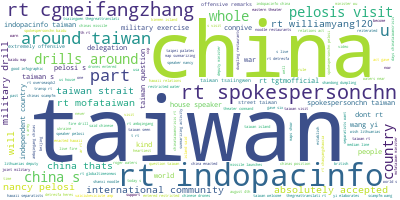

In [95]:
long_string = ','.join(list(tweets_df['clean_text'].values))

wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# 3.4 Sentiment Analysis

In [96]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
# # plot params
# plot_size = plt.rcParams["figure.figsize"] 
# plot_size[0] = 8
# plot_size[1] = 6
# plt.rcParams["figure.figsize"] = plot_size 

In [98]:
# # number of tweets for each airline
# sns.set(rc={'figure.figsize':(14,10)})
# tweets_df.polarity.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [99]:
# # Distribution of sentiments across all the tweets.
# sns.set(rc={'figure.figsize':(14,10)})
# tweets_df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [100]:
# sns.set(rc={'figure.figsize':(12,8)})
# sentiment = tweets_df.groupby(['Polarity', 'Sentiment']).sentiment.count().unstack()
# sentiment.plot(kind='bar')

### 3.4.1 Sentiment Analysis with Random Forest

In [101]:
# Selecting the feature and the label
features = tweets_df.iloc[:, 1].values
labels = tweets_df.iloc[:, 3].values

print(features)

['rt iameztoy extra random image i\n\nlets focus in one very specific zone of the western coast gt longjing district taichung city ta…'
 'rt indopacinfo chinas media explains the military reasons for each area of the drills in the taiwan strait\n\nread the labels in the pi…'
 'china even cut off communication they dont anwer phonecalls from the us but here clown zelenskyyua enters the stage to ask xijinping to change putins mind'
 ... 'reuters thanks pelosi smart move'
 'rt indopacinfo taiwan peoples desire for unification with china near record low as tensions rise\n\na survey from taiwans national che…'
 'rt indopacinfo taiwan peoples desire for unification with china near record low as tensions rise\n\na survey from taiwans national che…']


In [102]:
# Data Cleaning using regular expression
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


In [112]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

### Unigram

In [104]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features_vectorized = vectorizer.fit_transform(processed_features).toarray()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/egovridc/nltk_data'
    - '/home/egovridc/anaconda3/nltk_data'
    - '/home/egovridc/anaconda3/share/nltk_data'
    - '/home/egovridc/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [105]:
# split the dataset into training(80%) and testing(20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features_vectorized, labels, test_size=0.2, random_state=0)

NameError: name 'processed_features_vectorized' is not defined

In [106]:
# train the dataset with random forest algorirhm
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [107]:
# make prediction with trained model
predictions = text_classifier.predict(X_test)

NameError: name 'X_test' is not defined

In [108]:
predictions[:10]

NameError: name 'predictions' is not defined

In [109]:
# evaluate the model trained with random forest
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))

NameError: name 'y_test' is not defined

### Bigram

In [110]:
vectorizer_bigram = TfidfVectorizer (max_features=2189, min_df=7, max_df=0.8, stop_words=stopwords.words('english'),ngram_range = (2,2))
processed_features_vectorized_bigram = vectorizer_bigram.fit_transform(processed_features).toarray()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/egovridc/nltk_data'
    - '/home/egovridc/anaconda3/nltk_data'
    - '/home/egovridc/anaconda3/share/nltk_data'
    - '/home/egovridc/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [111]:
# split the dataset into training(80%) and testing(20%)
X_train, X_test, y_train, y_test = train_test_split(processed_features_vectorized_bigram, labels, test_size=0.2, random_state=0)

NameError: name 'processed_features_vectorized_bigram' is not defined

In [82]:
text_classifier_bigram = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier_bigram.fit(X_train, y_train)

In [ ]:
# make prediction with trained model
predictions = text_classifier.predict(X_test)

ValueError: X has 2300 features, but DecisionTreeClassifier is expecting 2189 features as input.

In [ ]:
# evaluate the model trained with random forest
print(accuracy_score(y_test, predictions))

### Sentiment Analysis with SGD

In [48]:
X = tweets_df['clean_text']
y = tweets_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [49]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

16500
5500
16500
5500


In [50]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import plot_confusion_matrix

In [51]:
# scaling the input
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-2))

In [52]:
count_vect = CountVectorizer(1,2)
#X_train = X_train.replace(np.nan, '', regex=True)
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()

In [53]:
clf.fit(X_train_counts, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(tol=0.01))])

In [54]:
X_test = X_test.replace(np.nan, '', regex=True)
# use transform not fit_transform
X_test_counts = count_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
# prediction = clf.prevaluedict(X_test_counts)
prediction = clf.predict(X_test_counts)

In [55]:
# making prediction
prediction = clf.predict(X_test_counts)

In [56]:
np.mean(prediction == y_test)

0.9214545454545454

In [57]:
# plot_confusion_matrix(clf, X_test, y_test, display_labels = ['negative', 'positive','neutral'])
# plt.suptitle('Confusion Matrix')
# plt.show()

### Sentiment Analysis with Naive Bayes